Note - currently works on VDI, not on AzureML 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [2]:
data = pd.read_csv('test.csv')

In [3]:
data_xr = data.set_index(['latitude', 'longitude']).to_xarray()

In [4]:
data_xr

<xarray.Dataset>
Dimensions:       (latitude: 51, longitude: 30)
Coordinates:
  * latitude      (latitude) float64 49.41 49.59 49.78 ... 58.41 58.59 58.78
  * longitude     (longitude) float64 -5.484 -5.203 -4.922 ... 2.109 2.391 2.672
Data variables:
    ml_fss_0.0    (latitude, longitude) float64 0.8426 0.8568 0.8282 ... nan nan
    ml_fss_0.25   (latitude, longitude) float64 0.7794 0.8008 0.7363 ... nan nan
    ml_fss_2.5    (latitude, longitude) float64 0.3028 0.2206 0.1322 ... nan nan
    ml_fss_7.0    (latitude, longitude) float64 0.1797 0.0562 ... nan nan
    ml_fss_10.0   (latitude, longitude) float64 2.518e-10 1.185e-10 ... nan nan
    nwp_fss_0.0   (latitude, longitude) float64 0.7494 0.737 0.697 ... nan nan
    nwp_fss_0.25  (latitude, longitude) float64 0.7414 0.762 0.7045 ... nan nan
    nwp_fss_2.5   (latitude, longitude) float64 0.01152 0.0 0.0 ... nan nan nan
    nwp_fss_7.0   (latitude, longitude) float64 0.0 0.0 0.0 ... nan nan nan
    nwp_fss_10.0  (latitude, longitude) float64 0.0 0.0 0.0 0.0 ... nan nan nan

In [70]:
def plot_fss(xrds, threshold, exceedance_val):
    
    ml_data = xrds[f'ml_fss_{threshold}']
    nwp_data = xrds[f'nwp_fss_{threshold}']
    
    vmin = min(ml_data.min(), nwp_data.min())
    vmin = max(vmin, 0)

    vmax = max(ml_data.max(), nwp_data.max())
    vmax = min(vmax, 1)
   
    # plot with three subplots
    # the first two panels shows radar and nwp data and final panel shows the difference
    fig, ax = plt.subplots(1, 2, subplot_kw={'projection': ccrs.Mercator()}, figsize=(10,5))
    
    extent= (-5.65, 1.7800, 49.9600, 55.65)
    ml_data.plot.pcolormesh(ax=ax[0], transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    ax[0].set_extent(extent)
    ax[0].coastlines()
    ax[0].set_title(f'ML model Fractional Skill Score \n (precip > {exceedance_val}mm)')

    nwp_data.plot.pcolormesh(ax=ax[1], transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    ax[1].set_extent(extent)
    ax[1].coastlines()
    ax[1].set_title(f'NWP Fractional Skill Score \n (precip > {exceedance_val}mm)')

    plt.show()

In [75]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [76]:
import cartopy 
cartopy.__version__

'0.20.2'

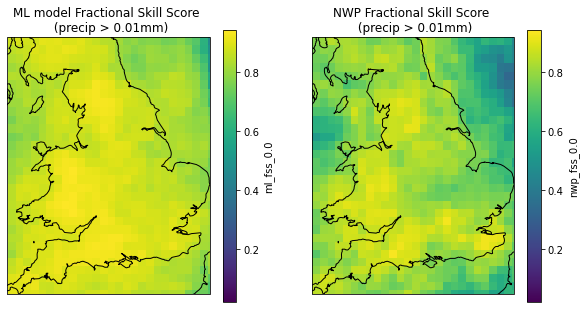

In [71]:
plot_fss(data_xr, '0.0', '0.01')

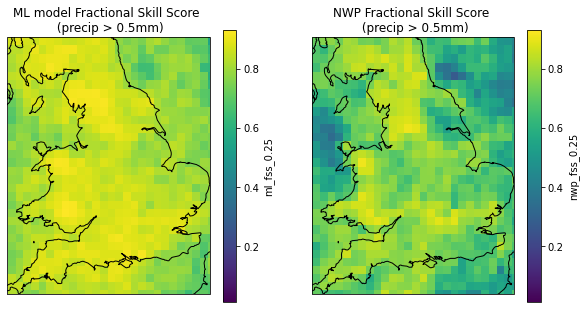

In [72]:
plot_fss(data_xr, '0.25', '0.5')

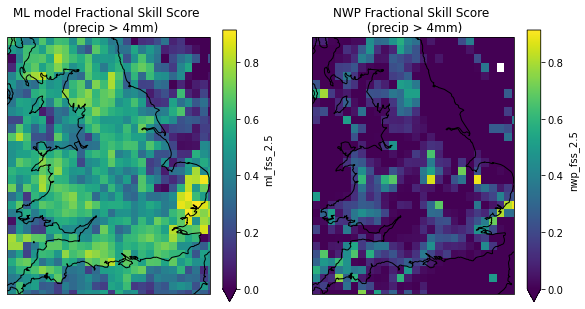

In [73]:
plot_fss(data_xr, '2.5', '4')

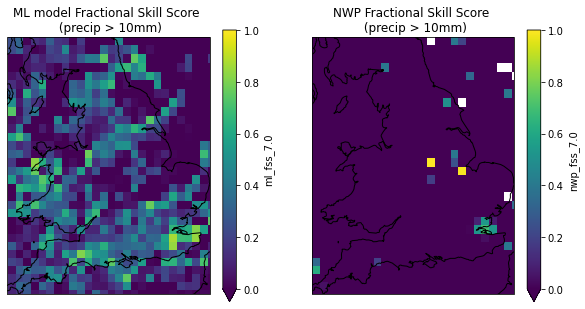

In [74]:
plot_fss(data_xr, '7.0', '10')